# 動畫觀看數預測

# 目標  
預測「巴哈姆特動畫瘋」動畫的平均觀看數，在動畫開播前，事先找出會受歡迎的動畫

# 載入資料集

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/BaHaMut_9.csv')
df

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
0,叫我對大哥 (TV版),2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,1.8,21.7
1,汪汪與喵喵,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0.3,6.6
2,鬼滅之刃 刀匠村篇,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,49.9,548.8
3,IDOLiSH7 - 偶像星願 - Third BEAT！,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,1.9,56.0
4,薄櫻鬼 新OVA,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,1.6,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,土下座跪求給看 年齡限制版,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,8.0,103.4
434,女神宿舍的管理員。 年齡限制版,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,11.3,112.7
435,彼得・格里爾的賢者時間 年齡限制版,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,11.2,133.9
436,壽司大相撲,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0.4,23.3


# 數值資料處理

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   動畫名       438 non-null    object 
 1   年份        438 non-null    int64  
 2   月份        438 non-null    object 
 3   集數        438 non-null    int64  
 4   星級        438 non-null    float64
 5   評分人數      438 non-null    int64  
 6   導演監督      436 non-null    object 
 7   製作廠商      438 non-null    object 
 8   作品分類1     438 non-null    object 
 9   作品分類2     434 non-null    object 
 10  作品分類3     316 non-null    object 
 11  作品分類4     142 non-null    object 
 12  作品分類5     44 non-null     object 
 13  作品分類6     5 non-null      object 
 14  原作載體      438 non-null    object 
 15  新續作       438 non-null    object 
 16  平均觀看數(萬)  438 non-null    float64
 17  總觀看數(萬)   438 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 61.7+ KB


In [ ]:
# 數值資料標準化
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
df_corr = df[['集數', '星級', '評分人數', '平均觀看數(萬)']]
arr = std.fit_transform(df_corr)
df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)']] = arr
df_corr

<ipython-input-3-c7bdfd2fae8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)']] = arr


,集數,星級,評分人數,平均觀看數(萬)
0,0.101010,0.942857,0.011385,0.019293
1,0.222222,0.942857,0.003795,0.003215
2,0.090909,0.942857,0.352941,0.534834
3,0.282828,0.942857,0.024668,0.020364
4,0.010101,0.942857,0.005693,0.017149
...,...,...,...,...
433,0.111111,0.857143,0.032258,0.085745
434,0.080808,0.914286,0.043643,0.121115
435,0.101010,0.771429,0.030361,0.120043
436,0.505051,0.742857,0.007590,0.004287


In [ ]:
# 計算相關係數
featuresCorr = df_corr[['集數', '星級', '評分人數',	'平均觀看數(萬)']].corr()
featuresCorr

,集數,星級,評分人數,平均觀看數(萬)
集數,1.000000,-0.024099,0.020247,-0.016369
星級,-0.024099,1.000000,0.276898,0.262252
評分人數,0.020247,0.276898,1.000000,0.813731
平均觀看數(萬),-0.016369,0.262252,0.813731,1.000000


# 視覺化

In [ ]:
# 設定matplotlib中文字型
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("darkgrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

--2023-12-24 09:48:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.18.138, 142.251.18.113, 142.251.18.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.18.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e62r1fnfrklucmb7jcb46l11qbe52gis/1703411250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=6eb64074-4eaa-4180-ad06-37b43d4bde03 [following]
--2023-12-24 09:48:25--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e62r1fnfrklucmb7jcb46l11qbe52gis/1703411250000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=6eb64074-4eaa-4180-ad06-37b43d4bde03
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.128.132, 2a00:1450:4013:c02::84
Connecting to doc-0k

<Axes: xlabel='星級', ylabel='平均觀看數(萬)'>

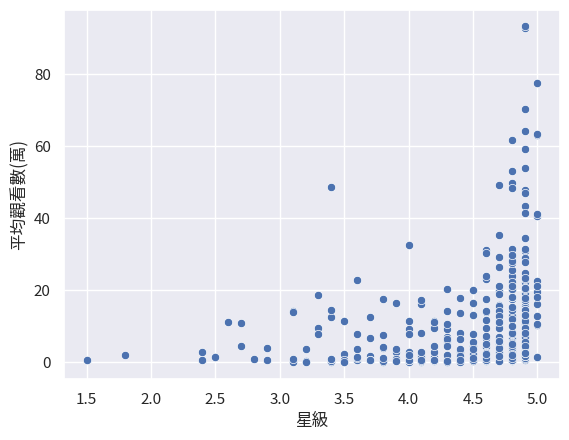

In [ ]:
# 平均觀看數與評分
sns.scatterplot(data=df, x="星級", y="平均觀看數(萬)")

count    438.000000
mean      10.668493
std       13.564352
min        0.000000
25%        1.900000
50%        5.850000
75%       13.975000
max       93.300000
Name: 平均觀看數(萬), dtype: float64

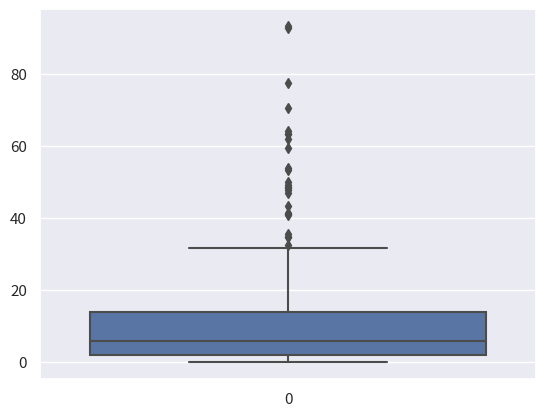

In [ ]:
# 箱型圖
sns.boxplot(data=df['平均觀看數(萬)'])
df['平均觀看數(萬)'].describe()

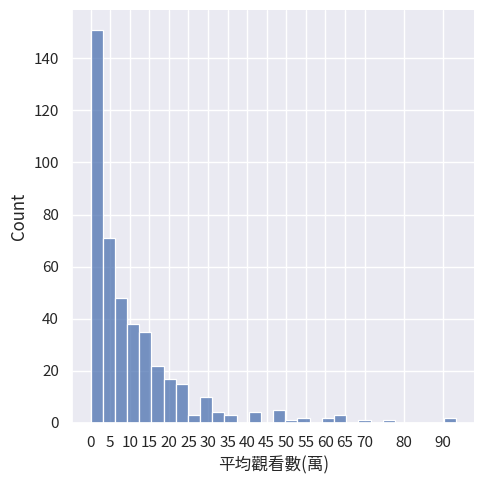

In [ ]:
# 直方圖
sns.displot(data=df, x='平均觀看數(萬)')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,80,90])
plt.show()

# 加入人氣度

In [9]:
w = round(df['平均觀看數(萬)'],0)
w.value_counts().sort_index()

0.0     25
1.0     57
2.0     49
3.0     25
4.0     29
5.0     26
6.0     14
7.0     17
8.0     23
9.0      5
10.0    17
11.0    11
12.0    11
13.0    14
14.0    12
15.0     6
16.0    10
17.0     4
18.0    10
19.0     3
20.0     8
21.0     6
22.0     4
23.0     7
24.0     3
25.0     1
26.0     2
28.0     4
29.0     4
30.0     2
31.0     2
32.0     3
35.0     2
36.0     1
41.0     2
42.0     1
43.0     1
47.0     1
48.0     2
49.0     2
50.0     1
53.0     1
54.0     1
59.0     1
62.0     1
63.0     2
64.0     1
70.0     1
78.0     1
93.0     2
Name: 平均觀看數(萬), dtype: int64

In [ ]:
# 加入人氣度
p = df['平均觀看數(萬)'].to_list()
q = []
# for number in p:
#     if number >= 40:
#         q.append(4)
#     elif 40 > number >= 20:
#         q.append(3)
#     elif 20 > number >= 10:
#         q.append(2)
#     elif 10 > number >= 1:
#         q.append(1)
#     elif number < 1:
#         q.append(0)

for number in p:
  if number >= 15:
    q.append(1)
  else:
    q.append(0)

df['人氣度'] = q
df1 = df[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]
df1

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
1,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
2,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,1
3,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,0
4,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,0
...,...,...,...,...,...,...,...,...,...
433,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,0
434,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,0
435,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,0
436,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0


# 比較基準

In [ ]:
# 比較基準
print(df['人氣度'].value_counts())
print()
print('人氣度0:', 339 / 438)

0    339
1     99
Name: 人氣度, dtype: int64

人氣度0: 0.773972602739726


# 資料不降維

## CountVectorizer

In [ ]:
No_DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TagList.append(tagStr)
No_DR_TagList

['喜劇 悠閒 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 泡麵番 闔家觀賞 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '偶像 音樂 遊戲改編 續作',
 '奇幻 戀愛 歷史 遊戲改編 續作',
 '科幻 機甲 喜劇 遊戲改編 新作',
 '科幻 機甲 校園 戰爭 原創作品 續作',
 '運動 競技 原創作品 續作',
 '動作 科幻 喜劇 職場 原創作品 新作',
 '冒險 奇幻 小說改編 新作',
 '動作 冒險 科幻 原創作品 新作',
 '冒險 喜劇 闔家觀賞 原創作品 新作',
 '超能力 科幻 競技 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '親情 懸疑 黑暗 漫畫改編 新作',
 '動作 冒險 異世界 血腥暴力 漫畫改編 續作',
 '親情 偶像 懸疑 漫畫改編 新作',
 '冒險 奇幻 異世界 料理 小說改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '冒險 奇幻 小說改編 新作',
 '機甲 歷史 戰爭 遊戲改編 續作',
 '校園 偶像 音樂 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '冒險 奇幻 魔法 戀愛 溫馨 漫畫改編 續作',
 '校園 青春 勵志 運動 競技 漫畫改編 續作',
 '奇幻 喜劇 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 小說改編 續作',
 '冒險 奇幻 感人 漫畫改編 續作',
 '動作 科幻 黑暗 遊戲改編 新作',
 '喜劇 青春 悠閒 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '喜劇 泡麵番 漫畫改編 新作',
 '動作 運動 競技 漫畫改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '校園 喜劇 戀愛 靈異神怪 漫畫改編 新作',
 '動作 超能力 勵志 溫馨 感人 靈異神怪 漫畫改編 續作',
 '科幻 機甲 戀愛 遊戲改編 續作',
 '奇幻 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 戰爭 血腥暴力 黑暗 18禁 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '動作 喜劇 溫馨 原創作品 新作',
 '冒險 奇幻 原創作品 新作',
 '動作 血腥暴力 漫畫改編 新作',
 '動作 奇幻 異世

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

x = No_DR_TagList
y = df['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()

print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(438, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.6931818181818182
0.7386363636363636
0.7727272727272727
0.6931818181818182
0.8409090909090909
0.7727272727272727
0.7727272727272727
0.8068181818181818
0.7613636363636364
0.7045454545454546



count    10.000000
mean      0.755682
std       0.048877
min       0.693182
25%       0.713068
50%       0.767045
75%       0.772727
max       0.840909
dtype: float64

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier()
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7727272727272727
0.8181818181818182
0.7954545454545454
0.7727272727272727
0.7272727272727273
0.6931818181818182
0.8522727272727273
0.8181818181818182
0.7840909090909091
0.8295454545454546



count    10.000000
mean      0.786364
std       0.048152
min       0.693182
25%       0.772727
50%       0.789773
75%       0.818182
max       0.852273
dtype: float64

In [ ]:
# import joblib
# joblib.dump(dec, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_CV_DT_3.pkl')

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.8081765935214211


### 隨機森林(導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8522727272727273
0.8295454545454546
0.7613636363636364
0.8409090909090909
0.8295454545454546
0.8068181818181818
0.8181818181818182
0.7954545454545454
0.8068181818181818
0.8295454545454546



count    10.000000
mean      0.817045
std       0.025941
min       0.761364
25%       0.806818
50%       0.823864
75%       0.829545
max       0.852273
dtype: float64

In [ ]:
# import joblib
# joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_CV_RF_60_10.pkl')

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 20}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=20), best_score:0.8240595611285266


## TfidfVectorizer

In [ ]:
No_DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TagList.append(tagStr)
No_DR_TagList

['喜劇 悠閒 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 泡麵番 闔家觀賞 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '偶像 音樂 遊戲改編 續作',
 '奇幻 戀愛 歷史 遊戲改編 續作',
 '科幻 機甲 喜劇 遊戲改編 新作',
 '科幻 機甲 校園 戰爭 原創作品 續作',
 '運動 競技 原創作品 續作',
 '動作 科幻 喜劇 職場 原創作品 新作',
 '冒險 奇幻 小說改編 新作',
 '動作 冒險 科幻 原創作品 新作',
 '冒險 喜劇 闔家觀賞 原創作品 新作',
 '超能力 科幻 競技 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '親情 懸疑 黑暗 漫畫改編 新作',
 '動作 冒險 異世界 血腥暴力 漫畫改編 續作',
 '親情 偶像 懸疑 漫畫改編 新作',
 '冒險 奇幻 異世界 料理 小說改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '冒險 奇幻 小說改編 新作',
 '機甲 歷史 戰爭 遊戲改編 續作',
 '校園 偶像 音樂 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '冒險 奇幻 魔法 戀愛 溫馨 漫畫改編 續作',
 '校園 青春 勵志 運動 競技 漫畫改編 續作',
 '奇幻 喜劇 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 小說改編 續作',
 '冒險 奇幻 感人 漫畫改編 續作',
 '動作 科幻 黑暗 遊戲改編 新作',
 '喜劇 青春 悠閒 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '喜劇 泡麵番 漫畫改編 新作',
 '動作 運動 競技 漫畫改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '校園 喜劇 戀愛 靈異神怪 漫畫改編 新作',
 '動作 超能力 勵志 溫馨 感人 靈異神怪 漫畫改編 續作',
 '科幻 機甲 戀愛 遊戲改編 續作',
 '奇幻 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 戰爭 血腥暴力 黑暗 18禁 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '動作 喜劇 溫馨 原創作品 新作',
 '冒險 奇幻 原創作品 新作',
 '動作 血腥暴力 漫畫改編 新作',
 '動作 奇幻 異世

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = No_DR_TagList
y = df['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(438, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.77717862 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.56922247 0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7840909090909091
0.8409090909090909
0.8068181818181818
0.7840909090909091
0.8522727272727273
0.7727272727272727
0.7954545454545454
0.7840909090909091
0.7954545454545454
0.7613636363636364



count    10.000000
mean      0.797727
std       0.028748
min       0.761364
25%       0.784091
50%       0.789773
75%       0.803977
max       0.852273
dtype: float64

In [ ]:
# import joblib
# joblib.dump(nb, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Tfidf_NB.pkl')

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier()
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8636363636363636
0.7840909090909091
0.7613636363636364
0.7954545454545454
0.7840909090909091
0.8181818181818182
0.7045454545454546
0.7954545454545454
0.8522727272727273
0.7954545454545454



count    10.000000
mean      0.795455
std       0.044819
min       0.704545
25%       0.784091
50%       0.795455
75%       0.812500
max       0.863636
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 5}, best_model:DecisionTreeClassifier(max_depth=5), best_score:0.7875653082549634


### 隨機森林(導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=20, min_samples_split=20)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8295454545454546
0.7159090909090909
0.8295454545454546
0.8409090909090909
0.8409090909090909
0.8636363636363636
0.8181818181818182
0.75
0.8636363636363636
0.8522727272727273



count    10.000000
mean      0.820455
std       0.049038
min       0.715909
25%       0.821023
50%       0.835227
75%       0.849432
max       0.863636
dtype: float64

In [ ]:
# # 導出模型
# import joblib
# joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Tfidf_RF_20_20.pkl')

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 20, 'n_estimators': 30}, best_model:RandomForestClassifier(min_samples_split=20, n_estimators=30), best_score:0.8218652037617555


## 對應字典法

In [ ]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}


In [ ]:
df2 = df[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]

# 非數值資料轉換
df2['作品分類1'] = df2['作品分類1'].replace(dict1)
df2['作品分類2'] = df2['作品分類2'].replace(dict1)
df2['作品分類3'] = df2['作品分類3'].replace(dict1)
df2['作品分類4'] = df2['作品分類4'].replace(dict1)
df2['作品分類5'] = df2['作品分類5'].replace(dict1)
df2['作品分類6'] = df2['作品分類6'].replace(dict1)
df2['原作載體'] = df2['原作載體'].replace(dict2)
df2['新續作'] = df2['新續作'].replace(dict3)

# NULL值以0代替
df2['作品分類1'] = df2['作品分類1'].fillna(0)
df2['作品分類2'] = df2['作品分類2'].fillna(0)
df2['作品分類3'] = df2['作品分類3'].fillna(0)
df2['作品分類4'] = df2['作品分類4'].fillna(0)
df2['作品分類5'] = df2['作品分類5'].fillna(0)
df2['作品分類6'] = df2['作品分類6'].fillna(0)


# 浮點數轉整數
df2['作品分類1'] = pd.to_numeric(df2['作品分類1'], errors='coerce', downcast='integer')
df2['作品分類2'] = pd.to_numeric(df2['作品分類2'], errors='coerce', downcast='integer')
df2['作品分類3'] = pd.to_numeric(df2['作品分類3'], errors='coerce', downcast='integer')
df2['作品分類4'] = pd.to_numeric(df2['作品分類4'], errors='coerce', downcast='integer')
df2['作品分類5'] = pd.to_numeric(df2['作品分類5'], errors='coerce', downcast='integer')
df2['作品分類6'] = pd.to_numeric(df2['作品分類6'], errors='coerce', downcast='integer')
df2

<ipython-input-22-1b3c3321bcc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['作品分類1'] = df2['作品分類1'].replace(dict1)
<ipython-input-22-1b3c3321bcc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['作品分類2'] = df2['作品分類2'].replace(dict1)
<ipython-input-22-1b3c3321bcc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,4,24,18,16,0,0,1,1,0
1,4,11,18,16,0,0,1,1,0
2,5,2,1,23,0,0,1,2,1
3,21,14,0,0,0,0,4,2,0
4,1,6,30,0,0,0,4,2,0
...,...,...,...,...,...,...,...,...,...
433,5,4,12,32,0,0,1,1,0
434,3,4,6,32,0,0,1,1,0
435,1,4,32,0,0,0,1,1,0
436,4,24,16,18,0,0,1,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   作品分類1   438 non-null    int8 
 1   作品分類2   438 non-null    int8 
 2   作品分類3   438 non-null    int8 
 3   作品分類4   438 non-null    int8 
 4   作品分類5   438 non-null    int8 
 5   作品分類6   438 non-null    int8 
 6   原作載體    438 non-null    int64
 7   新續作     438 non-null    int64
 8   人氣度     438 non-null    int64
dtypes: int64(3), int8(6)
memory usage: 13.0 KB


### 單純貝氏(測試訓練數值大小影響)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x = df2[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  nb = MultinomialNB()
  nb.fit(x_train, y_train)
  score = nb.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7386363636363636
0.6931818181818182
0.6931818181818182
0.7727272727272727
0.7954545454545454
0.6931818181818182
0.7954545454545454
0.7272727272727273
0.7272727272727273
0.7159090909090909



count    10.000000
mean      0.735227
std       0.040105
min       0.693182
25%       0.698864
50%       0.727273
75%       0.764205
max       0.795455
dtype: float64

### 決策樹(測試訓練數值大小影響)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = df2[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  dec = DecisionTreeClassifier(max_depth=3)
  # dec = DecisionTreeClassifier(max_depth=5)
  # dec = DecisionTreeClassifier(max_depth=10)
  # dec = DecisionTreeClassifier()
  dec.fit(x_train, y_train)
  score = dec.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8295454545454546
0.8409090909090909
0.6704545454545454
0.7840909090909091
0.7727272727272727
0.7954545454545454
0.8181818181818182
0.75
0.7954545454545454
0.875



count    10.000000
mean      0.793182
std       0.056132
min       0.670455
25%       0.775568
50%       0.795455
75%       0.826705
max       0.875000
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.7922413793103449


### 隨機森林(測試訓練數值大小影響)(導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df2[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
  rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)

  rf.fit(x_train, y_train)
  score = rf.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8181818181818182
0.8636363636363636
0.8068181818181818
0.7954545454545454
0.8181818181818182
0.8522727272727273
0.8181818181818182
0.7727272727272727
0.8295454545454546
0.8068181818181818



count    10.000000
mean      0.818182
std       0.026243
min       0.772727
25%       0.806818
50%       0.818182
75%       0.826705
max       0.863636
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,43,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 43}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=43), best_score:0.8286833855799373


In [ ]:
# # 導出模型
# import joblib
# joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Encoder_RF_60_10.pkl')

# 手動資料降維

In [ ]:
df_tag = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/pure_tag_table.csv')
df3 = df[['作品分類1','作品分類2','作品分類3','作品分類4','作品分類5','作品分類6','原作載體','新續作','人氣度']]
for tag in df_tag['index']:
  mask1 = df3['作品分類1'] == tag
  mask2 = df3['作品分類2'] == tag
  mask3 = df3['作品分類3'] == tag
  mask4 = df3['作品分類4'] == tag
  mask5 = df3['作品分類5'] == tag
  mask6 = df3['作品分類6'] == tag
  for index in df3.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].index:
    df3.iloc[index,0] = tag
df3

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,悠閒,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
1,泡麵番,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
2,血腥暴力,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,1
3,音樂,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,0
4,歷史,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,0
...,...,...,...,...,...,...,...,...,...
433,18禁,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,0
434,18禁,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,0
435,18禁,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,0
436,悠閒,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0


In [ ]:
df3 = df3[['作品分類1', '原作載體', '新續作', '人氣度']]
df4 = df3[['作品分類1', '原作載體', '新續作']]
df4

,作品分類1,原作載體,新續作
0,悠閒,漫畫改編,新作
1,泡麵番,漫畫改編,新作
2,血腥暴力,漫畫改編,續作
3,音樂,遊戲改編,續作
4,歷史,遊戲改編,續作
...,...,...,...
433,18禁,漫畫改編,新作
434,18禁,漫畫改編,新作
435,18禁,漫畫改編,新作
436,悠閒,漫畫改編,新作


## CountVectorizer

In [ ]:
DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df4.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TagList.append(tagStr)
DR_TagList

['悠閒 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '音樂 遊戲改編 續作',
 '歷史 遊戲改編 續作',
 '機甲 遊戲改編 新作',
 '戰爭 原創作品 續作',
 '競技 原創作品 續作',
 '職場 原創作品 新作',
 '奇幻 小說改編 新作',
 '科幻 原創作品 新作',
 '闔家觀賞 原創作品 新作',
 '競技 原創作品 新作',
 '冒險 小說改編 續作',
 '黑暗 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '偶像 漫畫改編 新作',
 '料理 小說改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '奇幻 小說改編 新作',
 '歷史 遊戲改編 續作',
 '偶像 原創作品 新作',
 '冒險 小說改編 續作',
 '溫馨 漫畫改編 續作',
 '運動 漫畫改編 續作',
 '靈異神怪 漫畫改編 續作',
 '奇幻 小說改編 續作',
 '感人 漫畫改編 續作',
 '黑暗 遊戲改編 新作',
 '悠閒 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '運動 漫畫改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '靈異神怪 漫畫改編 新作',
 '感人 漫畫改編 續作',
 '機甲 遊戲改編 續作',
 '靈異神怪 漫畫改編 續作',
 '18禁 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '溫馨 原創作品 新作',
 '奇幻 原創作品 新作',
 '血腥暴力 漫畫改編 新作',
 '血腥暴力 小說改編 新作',
 '超能力 漫畫改編 續作',
 '音樂 漫畫改編 新作',
 '悠閒 原創作品 續作',
 '戀愛 小說改編 續作',
 '職場 漫畫改編 新作',
 '科幻 漫畫改編 續作',
 '泡麵番 遊戲改編 續作',
 '運動 漫畫改編 續作',
 '悠閒 原創作品 新作',
 '懸疑 漫畫改編 續作',
 '戀愛 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '黑暗 小說改編 續作',
 '溫馨 小說改編 新作',
 'GL 小說改編 新作',
 '親情 漫畫改編 新作',
 '青春 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '特攝 漫畫改編 新作',
 '魔法

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

x = DR_TagList
y = df['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(438, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7386363636363636
0.8068181818181818
0.7840909090909091
0.7954545454545454
0.7386363636363636
0.7386363636363636
0.8181818181818182
0.8068181818181818
0.7613636363636364
0.7954545454545454



count    10.000000
mean      0.778409
std       0.031350
min       0.738636
25%       0.744318
50%       0.789773
75%       0.803977
max       0.818182
dtype: float64

In [ ]:
# # 導出模型
# import joblib
# joblib.dump(nb, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_CV_NB.pkl')

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=20)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier(max_depth=43)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8522727272727273
0.8295454545454546
0.8068181818181818
0.75
0.8295454545454546
0.7954545454545454
0.7840909090909091
0.8181818181818182
0.75
0.7386363636363636



count    10.000000
mean      0.795455
std       0.038999
min       0.738636
25%       0.758523
50%       0.801136
75%       0.826705
max       0.852273
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 20}, best_model:DecisionTreeClassifier(max_depth=20), best_score:0.8012800417972832


### 隨機森林(導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=20)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7840909090909091
0.75
0.7386363636363636
0.8409090909090909
0.8181818181818182
0.8181818181818182
0.8295454545454546
0.7613636363636364
0.8636363636363636
0.7840909090909091



count    10.000000
mean      0.798864
std       0.041511
min       0.738636
25%       0.767045
50%       0.801136
75%       0.826705
max       0.863636
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 30}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=30), best_score:0.8127220480668755


In [ ]:
# # 導出模型
# import joblib
# joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_CV_RF_60_20.pkl')

## TfidfVectorizer

In [ ]:
DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df4.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TagList.append(tagStr)
DR_TagList

['悠閒 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '音樂 遊戲改編 續作',
 '歷史 遊戲改編 續作',
 '機甲 遊戲改編 新作',
 '戰爭 原創作品 續作',
 '競技 原創作品 續作',
 '職場 原創作品 新作',
 '奇幻 小說改編 新作',
 '科幻 原創作品 新作',
 '闔家觀賞 原創作品 新作',
 '競技 原創作品 新作',
 '冒險 小說改編 續作',
 '黑暗 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '偶像 漫畫改編 新作',
 '料理 小說改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '奇幻 小說改編 新作',
 '歷史 遊戲改編 續作',
 '偶像 原創作品 新作',
 '冒險 小說改編 續作',
 '溫馨 漫畫改編 續作',
 '運動 漫畫改編 續作',
 '靈異神怪 漫畫改編 續作',
 '奇幻 小說改編 續作',
 '感人 漫畫改編 續作',
 '黑暗 遊戲改編 新作',
 '悠閒 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '運動 漫畫改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '靈異神怪 漫畫改編 新作',
 '感人 漫畫改編 續作',
 '機甲 遊戲改編 續作',
 '靈異神怪 漫畫改編 續作',
 '18禁 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '溫馨 原創作品 新作',
 '奇幻 原創作品 新作',
 '血腥暴力 漫畫改編 新作',
 '血腥暴力 小說改編 新作',
 '超能力 漫畫改編 續作',
 '音樂 漫畫改編 新作',
 '悠閒 原創作品 續作',
 '戀愛 小說改編 續作',
 '職場 漫畫改編 新作',
 '科幻 漫畫改編 續作',
 '泡麵番 遊戲改編 續作',
 '運動 漫畫改編 續作',
 '悠閒 原創作品 新作',
 '懸疑 漫畫改編 續作',
 '戀愛 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '黑暗 小說改編 續作',
 '溫馨 小說改編 新作',
 'GL 小說改編 新作',
 '親情 漫畫改編 新作',
 '青春 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '特攝 漫畫改編 新作',
 '魔法

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = DR_TagList
y = df['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(DR_TagList)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(438, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.90551842 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.79221343 0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    NB = MultinomialNB()
    NB.fit(x_train, y_train)
    score = NB.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7386363636363636
0.7840909090909091
0.8181818181818182
0.7159090909090909
0.8068181818181818
0.7613636363636364
0.7613636363636364
0.7613636363636364
0.75
0.8181818181818182



count    10.000000
mean      0.771591
std       0.034488
min       0.715909
25%       0.752841
50%       0.761364
75%       0.801136
max       0.818182
dtype: float64

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier(max_depth=30)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7954545454545454
0.8068181818181818
0.7954545454545454
0.875
0.75
0.7727272727272727
0.6931818181818182
0.7613636363636364
0.75
0.7727272727272727



count    10.000000
mean      0.777273
std       0.047067
min       0.693182
25%       0.752841
50%       0.772727
75%       0.795455
max       0.875000
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 20}, best_model:DecisionTreeClassifier(max_depth=20), best_score:0.8036050156739811


### 隨機森林(導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7727272727272727
0.7840909090909091
0.7727272727272727
0.7840909090909091
0.8409090909090909
0.8068181818181818
0.8068181818181818
0.8409090909090909
0.8181818181818182
0.7386363636363636



count    10.000000
mean      0.796591
std       0.032341
min       0.738636
25%       0.775568
50%       0.795455
75%       0.815341
max       0.840909
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 50}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=50), best_score:0.8035527690700104


In [ ]:
# # 導出模型
# import joblib
# joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Tfidf_RF_60_20.pkl')

## 對應字典法

In [ ]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}

In [ ]:
df5 = df4[['作品分類1', '原作載體', '新續作']]
df5['作品分類1'] = df4['作品分類1'].replace(dict1)
df5['原作載體'] = df4['原作載體'].replace(dict2)
df5['新續作'] = df4['新續作'].replace(dict3)
df5

,作品分類1,原作載體,新續作
0,24,1,1
1,18,1,1
2,23,1,2
3,14,4,2
4,30,4,2
...,...,...,...
433,32,1,1
434,32,1,1
435,32,1,1
436,24,1,1


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   作品分類1   438 non-null    int64
 1   原作載體    438 non-null    int64
 2   新續作     438 non-null    int64
dtypes: int64(3)
memory usage: 10.4 KB


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  nb = MultinomialNB()
  nb.fit(x_train, y_train)
  score = nb.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7840909090909091
0.7272727272727273
0.8068181818181818
0.7954545454545454
0.7272727272727273
0.7613636363636364
0.8295454545454546
0.7613636363636364
0.8068181818181818
0.8636363636363636



count    10.000000
mean      0.786364
std       0.043453
min       0.727273
25%       0.761364
50%       0.789773
75%       0.806818
max       0.863636
dtype: float64

In [ ]:
# # 導出模型
# import joblib
# joblib.dump(nb, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Encoder_NB.pkl')

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  dec = DecisionTreeClassifier(max_depth=3)
  # dec = DecisionTreeClassifier(max_depth=5)
  # dec = DecisionTreeClassifier(max_depth=10)
  # dec = DecisionTreeClassifier(max_depth=43)
  dec.fit(x_train, y_train)
  score = dec.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7954545454545454
0.7954545454545454
0.7954545454545454
0.7840909090909091
0.7613636363636364
0.7840909090909091
0.8295454545454546
0.8068181818181818
0.7272727272727273
0.8068181818181818



count    10.000000
mean      0.788636
std       0.027938
min       0.727273
25%       0.784091
50%       0.795455
75%       0.803977
max       0.829545
dtype: float64

In [ ]:
# # 導出模型
# import joblib
# joblib.dump(dec, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Encoder_DT_3.pkl')

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 10}, best_model:DecisionTreeClassifier(max_depth=10), best_score:0.7989289446185998


### 隨機森林(導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)
  rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)

  rf.fit(x_train, y_train)
  score = rf.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7727272727272727
0.8295454545454546
0.7840909090909091
0.7727272727272727
0.8068181818181818
0.8409090909090909
0.7613636363636364
0.7613636363636364
0.7045454545454546
0.7954545454545454



count    10.000000
mean      0.782955
std       0.038796
min       0.704545
25%       0.764205
50%       0.778409
75%       0.803977
max       0.840909
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,43,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 30, 'n_estimators': 20}, best_model:RandomForestClassifier(min_samples_split=30, n_estimators=20), best_score:0.7991118077324973


In [ ]:
# # 導出模型
# import joblib
# joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Encoder_RF_30_20.pkl')

## DictVectorizer

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dict = DictVectorizer(sparse=False)

x = df3[['作品分類1', '原作載體', '新續作']]
y = df3['人氣度']

dict = DictVectorizer(sparse=False)
x = dict.fit_transform(x.to_dict(orient='records'))

print(x.shape)
print()
print('訓練資料：')
print(x)
print()
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())

(438, 43)

訓練資料：
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

onehot 特徵名稱：
['作品分類1=18禁' '作品分類1=BL' '作品分類1=GL' '作品分類1=偶像' '作品分類1=冒險' '作品分類1=動作'
 '作品分類1=勵志' '作品分類1=喜劇' '作品分類1=奇幻' '作品分類1=悠閒' '作品分類1=感人' '作品分類1=懸疑'
 '作品分類1=戀愛' '作品分類1=戰爭' '作品分類1=推理' '作品分類1=料理' '作品分類1=時間穿越' '作品分類1=校園'
 '作品分類1=機甲' '作品分類1=歷史' '作品分類1=泡麵番' '作品分類1=溫馨' '作品分類1=特攝' '作品分類1=異世界'
 '作品分類1=科幻' '作品分類1=競技' '作品分類1=職場' '作品分類1=血腥暴力' '作品分類1=親情' '作品分類1=超能力'
 '作品分類1=運動' '作品分類1=闔家觀賞' '作品分類1=靈異神怪' '作品分類1=青春' '作品分類1=音樂' '作品分類1=魔法'
 '作品分類1=黑暗' '原作載體=原創作品' '原作載體=小說改編' '原作載體=漫畫改編' '原作載體=遊戲改編' '新續作=新作'
 '新續作=續作']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7159090909090909
0.8181818181818182
0.8068181818181818
0.8295454545454546
0.8068181818181818
0.7727272727272727
0.7840909090909091
0.8068181818181818
0.8181818181818182
0.7272727272727273



count    10.000000
mean      0.788636
std       0.039072
min       0.715909
25%       0.775568
50%       0.806818
75%       0.815341
max       0.829545
dtype: float64

In [ ]:
# # 導出模型
# import joblib
# joblib.dump(nb, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DV_NB.pkl')

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier(max_depth=20)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8522727272727273
0.7954545454545454
0.6818181818181818
0.7954545454545454
0.75
0.8295454545454546
0.8181818181818182
0.7613636363636364
0.8409090909090909
0.7954545454545454



count    10.000000
mean      0.792045
std       0.050551
min       0.681818
25%       0.769886
50%       0.795455
75%       0.826705
max       0.852273
dtype: float64

In [ ]:
# # 導出預測模型
# import joblib
# joblib.dump(dec, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DV_DT_43.pkl')

In [ ]:
# 網格搜索
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 20}, best_model:DecisionTreeClassifier(max_depth=20), best_score:0.8012800417972832


### 隨機森林(導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8068181818181818
0.8295454545454546
0.7727272727272727
0.8409090909090909
0.7954545454545454
0.7613636363636364
0.7272727272727273
0.7727272727272727
0.7954545454545454
0.7954545454545454



count    10.000000
mean      0.789773
std       0.033130
min       0.727273
25%       0.772727
50%       0.795455
75%       0.803977
max       0.840909
dtype: float64

In [ ]:
# # 導出預測模型
# import joblib
# joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DV_RF_60_10.pkl')

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,43,50,60], 'min_samples_split':[10,20,30]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 30, 'n_estimators': 20}, best_model:RandomForestClassifier(min_samples_split=30, n_estimators=20), best_score:0.8082810867293626


# 驗證模型準確率

In [ ]:
# 載入CSV
df_test = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/test_dataset.csv')

# 挑選需要的columns
df_test = df_test[['動畫名', '觀看數', '集數', '作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]

# 改變觀看數、集數資料型態
df_test['觀看數'] = df_test['觀看數'].map(lambda num:num[:-1])
df_test['觀看數'] = pd.to_numeric(df_test['觀看數'])
df_test['集數'] = pd.to_numeric(df_test['集數'])

# 新增平均觀看數
df_test['平均觀看數(萬)'] = round(df_test['觀看數'] / df_test['集數'], ndigits=2)

# 檢查缺失值
condition = df_test[['原作載體','新續作']].isnull().any(axis='columns')
df_test[condition]

# 填補缺失值
df_test.iloc[29,9] = '漫畫改編'
df_test.iloc[29,10] = '續作'
df_test.iloc[30,9] = '漫畫改編'
df_test.iloc[30,10] = '新作'
df_test.iloc[31,9] = '遊戲改編'
df_test.iloc[31,10] = '續作'
df_test.iloc[32,9] = '漫畫改編'
df_test.iloc[32,10] = '新作'
df_test.iloc[33,9] = '漫畫改編'
df_test.iloc[33,10] = '續作'

df_test

,動畫名,觀看數,集數,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬)
0,SHY 靦腆英雄,13.1,9,超能力,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,1.46
1,不死不運,101.5,8,動作,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,12.69
2,我的推是壞人大小姐。,41.9,9,異世界,魔法,校園,喜劇,戀愛,GL,小說改編,新作,4.66
3,我們的雨色協議,13.2,8,青春,競技,NaN,NaN,NaN,NaN,原創作品,新作,1.65
4,位於戀愛光譜極端的我們,46.8,8,校園,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...
71,川越男子歌唱團,2.1,8,校園,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0.26
72,B-PROJECT 〜熱烈＊Love Call〜,2.1,9,偶像,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0.23
73,米奇與達利,49.6,9,喜劇,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,5.51
74,咒術迴戰 第二季,738.2,19,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,38.85


In [ ]:
df_test['平均觀看數(萬)'].describe()

count    76.000000
mean      7.096447
std       6.732439
min       0.130000
25%       2.975000
50%       5.520000
75%       9.432500
max      38.850000
Name: 平均觀看數(萬), dtype: float64

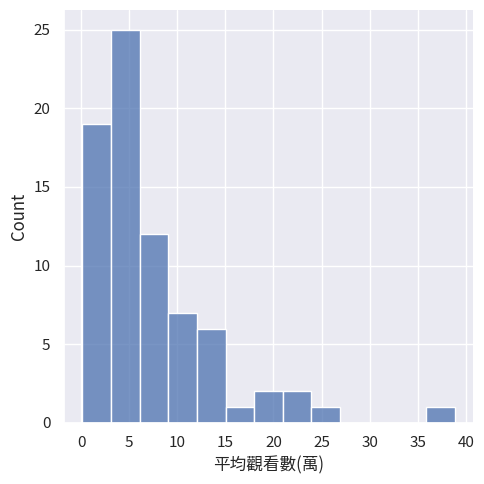

In [ ]:
sns.displot(data=df_test, x='平均觀看數(萬)')
plt.xticks([0,5,10,15,20,25,30,35,40])
plt.show()

## 設定人氣度

In [ ]:
u = round(df_test['平均觀看數(萬)'],0)
u.value_counts().sort_index()

0.0     7
1.0     6
2.0     5
3.0     6
4.0     5
5.0     8
6.0     8
7.0     7
8.0     3
9.0     2
10.0    3
11.0    3
12.0    1
13.0    4
14.0    1
15.0    1
19.0    1
20.0    1
21.0    1
24.0    1
26.0    1
39.0    1
Name: 平均觀看數(萬), dtype: int64

In [ ]:
p = df_test['平均觀看數(萬)'].to_list()
q = []

for number in p:
  if number >= 10:
    q.append(1)
  else:
    q.append(0)

df_test['人氣度'] = q
df_test1 = df_test[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]
df_test1

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,超能力,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,動作,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,1
2,異世界,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,青春,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,校園,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,校園,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,偶像,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,喜劇,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [ ]:
print(df_test1['人氣度'].value_counts())
np.percentile(df_test['平均觀看數(萬)'],78)

0    60
1    16
Name: 人氣度, dtype: int64


9.85

## 資料不降維


### CountVectorizer

In [ ]:
No_DR_TestList = ['18禁 bl 特攝']
for i in range(76):
    tagStr = []
    tags = df_test1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TestList.append(tagStr)
No_DR_TestList

['18禁 bl 特攝',
 '超能力 喜劇 職場 漫畫改編 新作',
 '動作 冒險 奇幻 超能力 血腥暴力 漫畫改編 新作',
 '異世界 魔法 校園 喜劇 戀愛 GL 小說改編 新作',
 '青春 競技 原創作品 新作',
 '校園 戀愛 小說改編 新作',
 '冒險 奇幻 魔法 小說改編 續作',
 '冒險 奇幻 異世界 魔法 校園 時間穿越 小說改編 新作',
 '溫馨 親情 感人 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 職場 漫畫改編 新作',
 '異世界 魔法 戀愛 小說改編 續作',
 '校園 喜劇 戀愛 漫畫改編 續作',
 '冒險 奇幻 魔法 血腥暴力 黑暗 漫畫改編 新作',
 '動作 喜劇 漫畫改編 新作',
 '競技 音樂 原創作品 新作',
 '動作 喜劇 溫馨 親情 漫畫改編 續作',
 '競技 音樂 原創作品 續作',
 '喜劇 闔家觀賞 泡麵番 遊戲改編 新作',
 '校園 喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 奇幻 異世界 魔法 血腥暴力 小說改編 續作',
 '溫馨 闔家觀賞 泡麵番 漫畫改編 新作',
 '冒險 奇幻 異世界 魔法 小說改編 續作',
 '冒險 奇幻 血腥暴力 黑暗 小說改編 續作',
 '校園 偶像 音樂 原創作品 續作',
 '科幻 機甲 職場 小說改編 新作',
 '校園 青春 溫馨 漫畫改編 新作',
 '奇幻 魔法 戀愛 小說改編 新作',
 '溫馨 職場 漫畫改編 新作',
 '職場 時間穿越 漫畫改編 新作',
 '冒險 奇幻 魔法 喜劇 戰爭 小說改編 新作',
 '動作 超能力 漫畫改編 續作',
 '動作 喜劇 血腥暴力 漫畫改編 新作',
 '運動 競技 遊戲改編 續作',
 '科幻 職場 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '冒險 奇幻 異世界 小說改編 新作',
 '校園 青春 競技 小說改編 新作',
 '職場 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 歷史 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '喜劇 溫馨 悠閒 漫畫改編 新作',
 '異世界 料理 小說改編 新作',
 '推理 懸疑 漫畫改編 新作',
 '冒險 奇幻 漫畫改編 新作',
 '奇幻 魔法 喜劇

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

x = No_DR_TestList
y = df_test['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(76, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### threshold_15 Random_Forest_60_10

In [ ]:
from sklearn.metrics import classification_report
import joblib

NoDR_CV_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/NoDR_CV_RF_60_10.pkl')

y_predict = NoDR_CV_RF_60_10.predict(x)

score = NoDR_CV_RF_60_10.score(x, y)

score = round(score, 2)

ret1 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret1)

0.76
              precision    recall  f1-score   support

         沒人氣       0.84      0.87      0.85        60
         有人氣       0.43      0.38      0.40        16

    accuracy                           0.76        76
   macro avg       0.63      0.62      0.63        76
weighted avg       0.75      0.76      0.76        76



### TfidfVectorizer

In [ ]:
No_DR_TestList = ['18禁 bl 特攝']
for i in range(76):
    tagStr = []
    tags = df_test1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TestList.append(tagStr)
No_DR_TestList

['18禁 bl 特攝',
 '超能力 喜劇 職場 漫畫改編 新作',
 '動作 冒險 奇幻 超能力 血腥暴力 漫畫改編 新作',
 '異世界 魔法 校園 喜劇 戀愛 GL 小說改編 新作',
 '青春 競技 原創作品 新作',
 '校園 戀愛 小說改編 新作',
 '冒險 奇幻 魔法 小說改編 續作',
 '冒險 奇幻 異世界 魔法 校園 時間穿越 小說改編 新作',
 '溫馨 親情 感人 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 職場 漫畫改編 新作',
 '異世界 魔法 戀愛 小說改編 續作',
 '校園 喜劇 戀愛 漫畫改編 續作',
 '冒險 奇幻 魔法 血腥暴力 黑暗 漫畫改編 新作',
 '動作 喜劇 漫畫改編 新作',
 '競技 音樂 原創作品 新作',
 '動作 喜劇 溫馨 親情 漫畫改編 續作',
 '競技 音樂 原創作品 續作',
 '喜劇 闔家觀賞 泡麵番 遊戲改編 新作',
 '校園 喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 奇幻 異世界 魔法 血腥暴力 小說改編 續作',
 '溫馨 闔家觀賞 泡麵番 漫畫改編 新作',
 '冒險 奇幻 異世界 魔法 小說改編 續作',
 '冒險 奇幻 血腥暴力 黑暗 小說改編 續作',
 '校園 偶像 音樂 原創作品 續作',
 '科幻 機甲 職場 小說改編 新作',
 '校園 青春 溫馨 漫畫改編 新作',
 '奇幻 魔法 戀愛 小說改編 新作',
 '溫馨 職場 漫畫改編 新作',
 '職場 時間穿越 漫畫改編 新作',
 '冒險 奇幻 魔法 喜劇 戰爭 小說改編 新作',
 '動作 超能力 漫畫改編 續作',
 '動作 喜劇 血腥暴力 漫畫改編 新作',
 '運動 競技 遊戲改編 續作',
 '科幻 職場 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '冒險 奇幻 異世界 小說改編 新作',
 '校園 青春 競技 小說改編 新作',
 '職場 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 歷史 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '喜劇 溫馨 悠閒 漫畫改編 新作',
 '異世界 料理 小說改編 新作',
 '推理 懸疑 漫畫改編 新作',
 '冒險 奇幻 漫畫改編 新作',
 '奇幻 魔法 喜劇

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = No_DR_TestList
y = df_test['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(76, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.60458128 ... 0.         0.32714441 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### threshold_15 Random_Forest_20_20

In [ ]:
from sklearn.metrics import classification_report
import joblib

NoDR_Tfidf_RF_20_20 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/NoDR_Tfidf_RF_20_20.pkl')

y_predict = NoDR_Tfidf_RF_20_20.predict(x)

score = NoDR_Tfidf_RF_20_20.score(x, y)

score = round(score, 2)

ret2 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret2)

0.76
              precision    recall  f1-score   support

         沒人氣       0.85      0.85      0.85        60
         有人氣       0.44      0.44      0.44        16

    accuracy                           0.76        76
   macro avg       0.64      0.64      0.64        76
weighted avg       0.76      0.76      0.76        76



#### threshold_15 Random_Forest_60_20

In [ ]:
from sklearn.metrics import classification_report
import joblib

NoDR_Tfidf_RF_60_20 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/NoDR_Tfidf_RF_60_20.pkl')

y_predict = NoDR_Tfidf_RF_60_20.predict(x)

score = NoDR_Tfidf_RF_60_20.score(x, y)

score = round(score, 2)

ret3 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret3)

0.83
              precision    recall  f1-score   support

         沒人氣       0.85      0.95      0.90        60
         有人氣       0.67      0.38      0.48        16

    accuracy                           0.83        76
   macro avg       0.76      0.66      0.69        76
weighted avg       0.81      0.83      0.81        76



### 對應字典法

In [ ]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}

In [ ]:
df_test2 = df_test1[['作品分類1','作品分類2','作品分類3','作品分類4','作品分類5','作品分類6','原作載體','新續作']]
df_test2['作品分類1'] = df_test2['作品分類1'].replace(dict1)
df_test2['作品分類2'] = df_test2['作品分類2'].replace(dict1)
df_test2['作品分類3'] = df_test2['作品分類3'].replace(dict1)
df_test2['作品分類4'] = df_test2['作品分類4'].replace(dict1)
df_test2['作品分類5'] = df_test2['作品分類5'].replace(dict1)
df_test2['作品分類6'] = df_test2['作品分類6'].replace(dict1)
df_test2['原作載體'] = df_test2['原作載體'].replace(dict2)
df_test2['新續作'] = df_test2['新續作'].replace(dict3)

df_test2['作品分類1'] = df_test2['作品分類1'].fillna(0)
df_test2['作品分類2'] = df_test2['作品分類2'].fillna(0)
df_test2['作品分類3'] = df_test2['作品分類3'].fillna(0)
df_test2['作品分類4'] = df_test2['作品分類4'].fillna(0)
df_test2['作品分類5'] = df_test2['作品分類5'].fillna(0)
df_test2['作品分類6'] = df_test2['作品分類6'].fillna(0)

df_test2['作品分類1'] = pd.to_numeric(df_test2['作品分類1'], downcast='integer')
df_test2['作品分類2'] = pd.to_numeric(df_test2['作品分類2'], downcast='integer')
df_test2['作品分類3'] = pd.to_numeric(df_test2['作品分類3'], downcast='integer')
df_test2['作品分類4'] = pd.to_numeric(df_test2['作品分類4'], downcast='integer')
df_test2['作品分類5'] = pd.to_numeric(df_test2['作品分類5'], downcast='integer')
df_test2['作品分類6'] = pd.to_numeric(df_test2['作品分類6'], downcast='integer')
df_test2

<ipython-input-64-799b70664fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['作品分類1'] = df_test2['作品分類1'].replace(dict1)
<ipython-input-64-799b70664fe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['作品分類2'] = df_test2['作品分類2'].replace(dict1)
<ipython-input-64-799b70664fe4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
0,19,4,22,0,0,0,1,1
1,5,2,1,19,23,0,1,1
2,8,10,3,4,6,36,2,1
3,7,13,0,0,0,0,3,1
4,3,6,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
71,3,4,7,14,0,0,3,1
72,21,14,0,0,0,0,3,2
73,4,25,20,0,0,0,1,1
74,5,1,19,3,23,15,1,2


In [ ]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   作品分類1   76 non-null     int8 
 1   作品分類2   76 non-null     int8 
 2   作品分類3   76 non-null     int8 
 3   作品分類4   76 non-null     int8 
 4   作品分類5   76 non-null     int8 
 5   作品分類6   76 non-null     int8 
 6   原作載體    76 non-null     int64
 7   新續作     76 non-null     int64
dtypes: int64(2), int8(6)
memory usage: 1.8 KB


#### threshold_15 Random_Forest_60_10

In [ ]:
from sklearn.metrics import classification_report
import joblib

x = df_test2.values
y = df_test['人氣度']

NoDR_Encoder_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/NoDR_Encoder_RF_60_10.pkl')

y_predict = NoDR_Encoder_RF_60_10.predict(x)

score = NoDR_Encoder_RF_60_10.score(x, y)

score = round(score, 2)

ret4 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret4)

0.83
              precision    recall  f1-score   support

         沒人氣       0.90      0.88      0.89        60
         有人氣       0.59      0.62      0.61        16

    accuracy                           0.83        76
   macro avg       0.74      0.75      0.75        76
weighted avg       0.83      0.83      0.83        76



## 手動資料降維

In [ ]:
df_test2 = df_test1
df_test2

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,超能力,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,動作,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,1
2,異世界,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,青春,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,校園,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,校園,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,偶像,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,喜劇,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [ ]:
df_tag = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/pure_tag_table.csv')
for tag in df_tag['index']:
  mask1 = df_test2['作品分類1'] == tag
  mask2 = df_test2['作品分類2'] == tag
  mask3 = df_test2['作品分類3'] == tag
  mask4 = df_test2['作品分類4'] == tag
  mask5 = df_test2['作品分類5'] == tag
  mask6 = df_test2['作品分類6'] == tag
  for index in df_test2.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].index:
    df_test2.iloc[index,0] = tag
df_test2

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,職場,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,血腥暴力,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,1
2,GL,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,競技,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,戀愛,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,音樂,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,音樂,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,推理,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,血腥暴力,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [ ]:
df_test3 = df_test2[['作品分類1', '原作載體', '新續作']]
df_test3

,作品分類1,原作載體,新續作
0,職場,漫畫改編,新作
1,血腥暴力,漫畫改編,新作
2,GL,小說改編,新作
3,競技,原創作品,新作
4,戀愛,小說改編,新作
...,...,...,...
71,音樂,原創作品,新作
72,音樂,原創作品,續作
73,推理,漫畫改編,新作
74,血腥暴力,漫畫改編,續作


In [ ]:
df_test3['作品分類1'].value_counts()

魔法      8
血腥暴力    5
戀愛      5
異世界     5
職場      4
青春      4
奇幻      4
黑暗      4
音樂      4
競技      3
時間穿越    3
喜劇      3
泡麵番     3
超能力     2
親情      2
偶像      2
感人      2
懸疑      2
運動      1
闔家觀賞    1
料理      1
冒險      1
機甲      1
悠閒      1
歷史      1
戰爭      1
溫馨      1
GL      1
推理      1
Name: 作品分類1, dtype: int64

### CountVectorizer

In [ ]:
DR_TestList = ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
for i in range(76):
    tagStr = []
    tags = df_test3.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TestList.append(tagStr)
DR_TestList

['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 新作',
 'GL 小說改編 新作',
 '競技 原創作品 新作',
 '戀愛 小說改編 新作',
 '魔法 小說改編 續作',
 '時間穿越 小說改編 新作',
 '感人 漫畫改編 新作',
 '職場 漫畫改編 新作',
 '魔法 小說改編 續作',
 '戀愛 漫畫改編 續作',
 '黑暗 漫畫改編 新作',
 '喜劇 漫畫改編 新作',
 '音樂 原創作品 新作',
 '親情 漫畫改編 續作',
 '音樂 原創作品 續作',
 '泡麵番 遊戲改編 新作',
 '戀愛 漫畫改編 新作',
 '血腥暴力 小說改編 續作',
 '泡麵番 漫畫改編 新作',
 '魔法 小說改編 續作',
 '黑暗 小說改編 續作',
 '偶像 原創作品 續作',
 '機甲 小說改編 新作',
 '溫馨 漫畫改編 新作',
 '魔法 小說改編 新作',
 '職場 漫畫改編 新作',
 '時間穿越 漫畫改編 新作',
 '戰爭 小說改編 新作',
 '超能力 漫畫改編 續作',
 '血腥暴力 漫畫改編 新作',
 '競技 遊戲改編 續作',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '異世界 小說改編 新作',
 '競技 小說改編 新作',
 '泡麵番 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '歷史 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '悠閒 漫畫改編 新作',
 '料理 小說改編 新作',
 '懸疑 漫畫改編 新作',
 '奇幻 漫畫改編 新作',
 '親情 漫畫改編 新作',
 '魔法 小說改編 新作',
 '奇幻 小說改編 新作',
 '戀愛 漫畫改編 新作',
 '感人 漫畫改編 新作',
 '黑暗 小說改編 新作',
 '冒險 小說改編 新作',
 '闔家觀賞 漫畫改編 續作',
 '運動 原創作品 新作',
 '黑暗 漫畫改編 新作',
 '懸疑 小說改編 新作',
 '異世界 小說改編 新作',
 '青春 漫畫改編 續作',
 '魔法 小說改編 續作',
 '青春 漫畫改編 續作',
 '青春 小說改編 新作',
 '喜劇 漫畫改編 新作',
 '奇幻 遊戲改編 新作',
 '超能力 原創作品 新作',
 '魔

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

x = DR_TestList
y = df_test['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(76, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### threhold_15 NaiveBayes

In [ ]:
from sklearn.metrics import classification_report
import joblib

DR_CV_NB = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/DR_CV_NB.pkl')

y_predict = DR_CV_NB.predict(x)

score = DR_CV_NB.score(x, y)

score = round(score, 2)

ret5 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret5)

0.78
              precision    recall  f1-score   support

         沒人氣       0.91      0.80      0.85        60
         有人氣       0.48      0.69      0.56        16

    accuracy                           0.78        76
   macro avg       0.69      0.74      0.71        76
weighted avg       0.82      0.78      0.79        76



#### threhold_15 Random_Forest_60_20

In [ ]:
from sklearn.metrics import classification_report
import joblib

DR_CV_RF_60_20 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/DR_CV_RF_60_20.pkl')

y_predict = DR_CV_RF_60_20.predict(x)

score = DR_CV_RF_60_20.score(x, y)

score = round(score, 2)

ret6 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret6)

0.7
              precision    recall  f1-score   support

         沒人氣       0.86      0.73      0.79        60
         有人氣       0.36      0.56      0.44        16

    accuracy                           0.70        76
   macro avg       0.61      0.65      0.62        76
weighted avg       0.76      0.70      0.72        76



### TfidfVectorizer

In [ ]:
DR_TestList = ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
for i in range(76):
    tagStr = []
    tags = df_test3.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TestList.append(tagStr)
DR_TestList

['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 新作',
 'GL 小說改編 新作',
 '競技 原創作品 新作',
 '戀愛 小說改編 新作',
 '魔法 小說改編 續作',
 '時間穿越 小說改編 新作',
 '感人 漫畫改編 新作',
 '職場 漫畫改編 新作',
 '魔法 小說改編 續作',
 '戀愛 漫畫改編 續作',
 '黑暗 漫畫改編 新作',
 '喜劇 漫畫改編 新作',
 '音樂 原創作品 新作',
 '親情 漫畫改編 續作',
 '音樂 原創作品 續作',
 '泡麵番 遊戲改編 新作',
 '戀愛 漫畫改編 新作',
 '血腥暴力 小說改編 續作',
 '泡麵番 漫畫改編 新作',
 '魔法 小說改編 續作',
 '黑暗 小說改編 續作',
 '偶像 原創作品 續作',
 '機甲 小說改編 新作',
 '溫馨 漫畫改編 新作',
 '魔法 小說改編 新作',
 '職場 漫畫改編 新作',
 '時間穿越 漫畫改編 新作',
 '戰爭 小說改編 新作',
 '超能力 漫畫改編 續作',
 '血腥暴力 漫畫改編 新作',
 '競技 遊戲改編 續作',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '異世界 小說改編 新作',
 '競技 小說改編 新作',
 '泡麵番 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '歷史 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '悠閒 漫畫改編 新作',
 '料理 小說改編 新作',
 '懸疑 漫畫改編 新作',
 '奇幻 漫畫改編 新作',
 '親情 漫畫改編 新作',
 '魔法 小說改編 新作',
 '奇幻 小說改編 新作',
 '戀愛 漫畫改編 新作',
 '感人 漫畫改編 新作',
 '黑暗 小說改編 新作',
 '冒險 小說改編 新作',
 '闔家觀賞 漫畫改編 續作',
 '運動 原創作品 新作',
 '黑暗 漫畫改編 新作',
 '懸疑 小說改編 新作',
 '異世界 小說改編 新作',
 '青春 漫畫改編 續作',
 '魔法 小說改編 續作',
 '青春 漫畫改編 續作',
 '青春 小說改編 新作',
 '喜劇 漫畫改編 新作',
 '奇幻 遊戲改編 新作',
 '超能力 原創作品 新作',
 '魔

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = DR_TestList
y = df_test['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(76, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.89181757 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### threshold_15 Random_Forest_60_10

In [ ]:
from sklearn.metrics import classification_report
import joblib

DR_Tfidf_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/DR_Tfidf_RF_60_10.pkl')

y_predict = DR_Tfidf_RF_60_10.predict(x)

score = DR_Tfidf_RF_60_10.score(x, y)

score = round(score, 2)

ret7 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret7)

0.74
              precision    recall  f1-score   support

         沒人氣       0.81      0.87      0.84        60
         有人氣       0.33      0.25      0.29        16

    accuracy                           0.74        76
   macro avg       0.57      0.56      0.56        76
weighted avg       0.71      0.74      0.72        76



### 字典對應法

In [ ]:
df_test4 = df_test3[['作品分類1', '原作載體', '新續作']]

# 非數值資料轉換
df_test4['作品分類1'] = df_test4['作品分類1'].replace(dict1)
df_test4['原作載體'] = df_test4['原作載體'].replace(dict2)
df_test4['新續作'] = df_test4['新續作'].replace(dict3)

df_test4

,作品分類1,原作載體,新續作
0,22,1,1
1,23,1,1
2,36,2,1
3,13,3,1
4,6,2,1
...,...,...,...
71,14,3,1
72,14,3,2
73,25,1,1
74,23,1,2


#### threshold_15 Random_Forest_30_20

In [ ]:
from sklearn.metrics import classification_report
import joblib

x = df_test4.values
y = df_test['人氣度']

DR_Encoder_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/DR_Encoder_RF_60_10.pkl')

y_predict = DR_Encoder_RF_60_10.predict(x)

score = DR_Encoder_RF_60_10.score(x, y)

score = round(score, 2)

ret8 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret8)

0.72
              precision    recall  f1-score   support

         沒人氣       0.84      0.80      0.82        60
         有人氣       0.37      0.44      0.40        16

    accuracy                           0.72        76
   macro avg       0.61      0.62      0.61        76
weighted avg       0.74      0.72      0.73        76



### DictVectorizer

In [ ]:
# 補足df_test4缺少的標籤(必須與訓練資料一樣)
# ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
df_test5 = pd.concat([df_test3, pd.DataFrame([['18禁','原創作品','新作'],
               ['bl','原創作品','新作'],
               ['特攝','原創作品','新作'],
               ['動作','原創作品','新作'],
               ['勵志','原創作品','新作'],
               ['校園','原創作品','新作'],
               ['科幻','原創作品','新作'],
               ['靈異神怪','原創作品','新作']], columns=['作品分類1', '原作載體', '新續作'])])

df_test5.tail(10)

,作品分類1,原作載體,新續作
74,血腥暴力,漫畫改編,續作
75,異世界,小說改編,新作
0,18禁,原創作品,新作
1,bl,原創作品,新作
2,特攝,原創作品,新作
3,動作,原創作品,新作
4,勵志,原創作品,新作
5,校園,原創作品,新作
6,科幻,原創作品,新作
7,靈異神怪,原創作品,新作


In [ ]:
from sklearn.feature_extraction import DictVectorizer
dict = DictVectorizer(sparse=False)

x = df_test5[['作品分類1', '原作載體', '新續作']]
y = df_test['人氣度']

dict = DictVectorizer(sparse=False)
x = dict.fit_transform(x.to_dict(orient='records'))
x = list(x)
del x[-8:]
x = np.array(x)

print(x.shape)
print()
print('訓練資料：')
print(x)
print()
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())

(76, 43)

訓練資料：
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]

onehot 特徵名稱：
['作品分類1=18禁' '作品分類1=GL' '作品分類1=bl' '作品分類1=偶像' '作品分類1=冒險' '作品分類1=動作'
 '作品分類1=勵志' '作品分類1=喜劇' '作品分類1=奇幻' '作品分類1=悠閒' '作品分類1=感人' '作品分類1=懸疑'
 '作品分類1=戀愛' '作品分類1=戰爭' '作品分類1=推理' '作品分類1=料理' '作品分類1=時間穿越' '作品分類1=校園'
 '作品分類1=機甲' '作品分類1=歷史' '作品分類1=泡麵番' '作品分類1=溫馨' '作品分類1=特攝' '作品分類1=異世界'
 '作品分類1=科幻' '作品分類1=競技' '作品分類1=職場' '作品分類1=血腥暴力' '作品分類1=親情' '作品分類1=超能力'
 '作品分類1=運動' '作品分類1=闔家觀賞' '作品分類1=靈異神怪' '作品分類1=青春' '作品分類1=音樂' '作品分類1=魔法'
 '作品分類1=黑暗' '原作載體=原創作品' '原作載體=小說改編' '原作載體=漫畫改編' '原作載體=遊戲改編' '新續作=新作'
 '新續作=續作']


#### threshold_15 NaiveBayes

In [ ]:
from sklearn.metrics import classification_report
import joblib

DR_DV_NB = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/DR_DV_NB.pkl')

y_predict = DR_DV_NB.predict(x)

score = DR_DV_NB.score(x, y)

score = round(score, 2)

ret9 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret9)

0.72
              precision    recall  f1-score   support

         沒人氣       0.83      0.82      0.82        60
         有人氣       0.35      0.38      0.36        16

    accuracy                           0.72        76
   macro avg       0.59      0.60      0.59        76
weighted avg       0.73      0.72      0.73        76



#### threshold_15 Random_Forest_20_10

In [ ]:
from sklearn.metrics import classification_report
import joblib

DR_DV_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/threshold_15/DR_DV_RF_60_10.pkl')

y_predict = DR_DV_RF_60_10.predict(x)

score = DR_DV_RF_60_10.score(x, y)

score = round(score, 2)

ret10 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret10)

0.78
              precision    recall  f1-score   support

         沒人氣       0.88      0.83      0.85        60
         有人氣       0.47      0.56      0.51        16

    accuracy                           0.78        76
   macro avg       0.68      0.70      0.68        76
weighted avg       0.79      0.78      0.78        76



## 混淆矩陣

In [ ]:
print('不降維 CV 隨機森林_60_10\n',ret1)
# print('不降維 Tfidf 隨機森林_20_20\n',ret2)
print('不降維 Tfidf 隨機森林_60_20\n',ret3)
print('不降維 對應字典法 隨機森林_60_10\n',ret4)
print('降維 單純貝氏\n',ret5)
print('降維 CV 隨機森林_60_20\n',ret6)
print('降維 Tfidf 隨機森林_60_10\n',ret7)
print('降維 字典對應法 隨機森林_30_20\n',ret8)
print('降維 DV 單純貝氏\n',ret9)
print('降維 DV 隨機森林_20_10\n',ret10)

不降維 Tfidf 隨機森林_60_20
               precision    recall  f1-score   support

         沒人氣       0.85      0.95      0.90        60
         有人氣       0.67      0.38      0.48        16

    accuracy                           0.83        76
   macro avg       0.76      0.66      0.69        76
weighted avg       0.81      0.83      0.81        76

不降維 對應字典法 隨機森林_60_10
               precision    recall  f1-score   support

         沒人氣       0.90      0.88      0.89        60
         有人氣       0.59      0.62      0.61        16

    accuracy                           0.83        76
   macro avg       0.74      0.75      0.75        76
weighted avg       0.83      0.83      0.83        76



In [ ]:
# # 預測沒人看的作品，真的沒人看 -> 0.90
# # 預測有人看的作品，真的有人看 -> 0.59
# # 沒人氣的作品，預測沒人氣   -> 0.88
# # 有人氣的作品，預測有人氣   -> 0.62

### 實例說明精確率、召回率

In [ ]:
# 有人氣的作品，預測有人氣

# x1 = []
# y1 = []
# for index in df_test[df_test1['人氣度']==1].index:
#   x1.append(x[index])
#   y1.append(y[index])
# y_predeict = NoDR_Tfidf_RF_10_20.predict(x1)
# score = NoDR_Tfidf_RF_10_20.score(x1, y1)
# score = round(score, 2)
# print(score)
# print(y1)
# print(y_predeict)

In [ ]:
# # indices is a tuple of two arrays
# indices = np.where(y_predict == 1)
# indices = indices[0]
# print(indices)
# df_test.iloc[indices]

# 結論


1. 隨機森林 > 決策樹 > 單純貝氏
2. TfidfVectorizer > CountVectorizer(未降維) = DictVectorizer > 對應字典法
3. 特徵數減少後，決策樹的準確率也不錯
4. 機器學習模型解釋力不高  
5. 模型缺陷:人氣度區隔標準
6. 待克服:
  - 原始資料轉換矩陣
  - 加入新資料(導演、製作公司)
  - 建立迴歸模型

# 附錄:影響觀看數關鍵因子

In [ ]:
# 各標籤占比
df_ratio_table = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/ratio_table.csv')
df_ratio_table

,index,全部,前25%,比例(%)
0,異世界,53,32,60.38
1,時間穿越,5,3,60.00
2,魔法,48,28,58.33
3,小說改編,103,56,54.37
4,血腥暴力,21,11,52.38
5,GL,2,1,50.00
6,奇幻,145,61,42.07
7,超能力,27,11,40.74
8,動作,95,38,40.00
9,冒險,129,50,38.76


In [ ]:
df_ratio_table.rename(columns={'index': '標籤', '全部': '全部作品數', '前25%': '前25%作品數', '比例(%)': '受歡迎比例(%)'}, inplace=True)

In [ ]:
df_ratio_table['占全部作品比例(%)'] = round(df_ratio_table['全部作品數'] / 438 * 100, 1)
df_ratio_table['占前25%作品比例(%)'] = round(df_ratio_table['前25%作品數'] / 110 * 100, 1)
df_ratio_table
df_genre_table = df_ratio_table.drop([3,13,19,21,33,37])
df_genre2_table = df_ratio_table.loc[[21, 13, 19, 3, 33, 37]]
df_genre_table

,標籤,全部作品數,前25%作品數,受歡迎比例(%),占全部作品比例(%),占前25%作品比例(%)
0,異世界,53,32,60.38,12.1,29.1
1,時間穿越,5,3,60.00,1.1,2.7
2,魔法,48,28,58.33,11.0,25.5
4,血腥暴力,21,11,52.38,4.8,10.0
5,GL,2,1,50.00,0.5,0.9
6,奇幻,145,61,42.07,33.1,55.5
7,超能力,27,11,40.74,6.2,10.0
8,動作,95,38,40.00,21.7,34.5
9,冒險,129,50,38.76,29.5,45.5
10,黑暗,14,5,35.71,3.2,4.5


In [ ]:
# 降維後的資料表加入「平均觀看數(萬)」
df6 = df3[['作品分類1', '原作載體', '新續作']]
df6['平均觀看數(萬)'] = df['平均觀看數(萬)']
df6

,作品分類1,原作載體,新續作,平均觀看數(萬)
0,悠閒,漫畫改編,新作,1.8
1,泡麵番,漫畫改編,新作,0.3
2,血腥暴力,漫畫改編,續作,49.9
3,音樂,遊戲改編,續作,1.9
4,歷史,遊戲改編,續作,1.6
...,...,...,...,...
433,18禁,漫畫改編,新作,8.0
434,18禁,漫畫改編,新作,11.3
435,18禁,漫畫改編,新作,11.2
436,悠閒,漫畫改編,新作,0.4


## 作品分類

In [ ]:
np.percentile(df6['平均觀看數(萬)'],78)

15.486

In [ ]:
# 每種標籤觀看數統計
d = {}
for item in df_tag['index']:
  mask = df6['作品分類1'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_tag_view = pd.DataFrame(d)
df_tag_view = df_tag_view.T.sort_values('最高', ascending=False)
df_tag_view

,最低,平均,中位數,最高
血腥暴力,1.8,31.0,19.0,93.3
戀愛,1.7,14.9,12.7,77.6
親情,0.1,14.1,7.7,70.4
偶像,0.6,6.7,2.4,64.2
青春,0.7,14.4,8.0,63.3
音樂,0.4,8.9,2.1,63.2
魔法,1.2,21.1,16.5,61.8
戰爭,1.6,15.6,6.8,59.3
喜劇,0.1,15.2,11.0,53.3
異世界,3.6,15.8,12.5,48.4


In [ ]:
ddd1 = df6['作品分類1'].value_counts().to_dict()
ddd2 = df6[df6['平均觀看數(萬)'] >= 14]['作品分類1'].value_counts().to_dict()
df_tag_view['全部作品數'] = ddd1
df_tag_view['前25%作品數'] = ddd2
df_tag_view['受歡迎比例(%)'] = round(df_tag_view['前25%作品數'] / df_tag_view['全部作品數'] * 100, 1)
df_tag_view['占全部作品比例(%)'] = round(df_tag_view['全部作品數']/ 438 * 100, 1)
df_tag_view['占前25%作品比例(%)'] = round(df_tag_view['前25%作品數']/ 110 * 100, 1)
df_tag_view = df_tag_view[['全部作品數','前25%作品數','受歡迎比例(%)','占全部作品比例(%)','占前25%作品比例(%)','最低','平均','中位數','最高']]
df_tag_view['前25%作品數'] = df_tag_view['前25%作品數'].fillna(0)
df_tag_view['受歡迎比例(%)'] = df_tag_view['受歡迎比例(%)'].fillna(0)
df_tag_view['占前25%作品比例(%)'] = df_tag_view['占前25%作品比例(%)'].fillna(0)
df_tag_view['前25%作品數'] = pd.to_numeric(df_tag_view['前25%作品數'], downcast='integer')
df_tag_view

,全部作品數,前25%作品數,受歡迎比例(%),占全部作品比例(%),占前25%作品比例(%),最低,平均,中位數,最高
血腥暴力,14,8,57.1,3.2,7.3,1.8,31.0,19.0,93.3
戀愛,25,10,40.0,5.7,9.1,1.7,14.9,12.7,77.6
親情,8,1,12.5,1.8,0.9,0.1,14.1,7.7,70.4
偶像,18,2,11.1,4.1,1.8,0.6,6.7,2.4,64.2
青春,18,5,27.8,4.1,4.5,0.7,14.4,8.0,63.3
音樂,16,2,12.5,3.7,1.8,0.4,8.9,2.1,63.2
魔法,35,25,71.4,8.0,22.7,1.2,21.1,16.5,61.8
戰爭,11,4,36.4,2.5,3.6,1.6,15.6,6.8,59.3
喜劇,12,5,41.7,2.7,4.5,0.1,15.2,11.0,53.3
異世界,17,8,47.1,3.9,7.3,3.6,15.8,12.5,48.4


In [ ]:
df6[df6['作品分類1']=='料理'].index
df.iloc[[17, 91, 139, 189, 210, 388, 427]]

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬),人氣度
17,擁有超常技能的異世界流浪美食家,2023,冬番,12,4.9,22100,松田清,MAPPA,冒險,奇幻,異世界,料理,NaN,NaN,小說改編,新作,28.9,346.5,1
91,相合之物,2022,春番,12,4.9,6400,追崎史敏,ENCOURAGE FILMS,溫馨,悠閒,料理,親情,職場,NaN,漫畫改編,新作,7.5,89.9,0
139,搖曳露營△ 第二季,2021,冬番,13,5.0,8100,京極義昭,C-Station,溫馨,悠閒,料理,闔家觀賞,NaN,NaN,漫畫改編,續作,13.0,168.5,0
189,舞伎家的料理人,2021,冬番,12,4.9,1100,鈴木洋平,J.C.STAFF,溫馨,料理,闔家觀賞,NaN,NaN,NaN,漫畫改編,新作,2.1,24.8,0
210,食戟之靈 豪之皿,2020,春番,13,4.6,1500,米谷良知,J.C.STAFF,校園,料理,NaN,NaN,NaN,NaN,漫畫改編,續作,13.9,180.7,0
388,異世界食堂 2,2021,秋番,12,4.9,5000,神保昌登,OLM,奇幻,異世界,溫馨,料理,NaN,NaN,小說改編,續作,13.2,157.8,0
427,黃金神威 第三季,2020,秋番,12,5.0,3900,難波日登志,Geno Studio,動作,冒險,料理,歷史,NaN,NaN,漫畫改編,續作,10.6,126.6,0


## 原作載體

In [ ]:
d = {}
for item in df6['原作載體'].unique():
  mask = df6['原作載體'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_original = pd.DataFrame(d)
df_original = df_original.T.sort_values('最高', ascending=False)
# t1 = []
# t2 = []
# for item in df_original.index:
#   s1 = df_ratio_table[df_ratio_table['index'] == item]['全部']
#   s2 = df_ratio_table[df_ratio_table['index'] == item]['前25%']
#   t1.append(s1.iloc[0])
#   t2.append(s2.iloc[0])
# df_original['全部'] = t1
# df_original['前25%'] = t2
df_original

,最低,平均,中位數,最高
漫畫改編,0.0,11.2,6.8,93.3
小說改編,0.3,17.6,14.4,61.8
原創作品,0.1,5.0,1.8,59.3
遊戲改編,0.2,2.7,1.9,15.8


## 新續作

In [ ]:
d = {}
for item in df6['新續作'].unique():
  mask = df6['新續作'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_new_old = pd.DataFrame(d)
df_new_old = df_new_old.T.sort_values('最高', ascending=False)
t1 = []
t2 = []
# for item in df_new_old.index:
#   s1 = df_ratio_table[df_ratio_table['index'] == item]['全部']
#   s2 = df_ratio_table[df_ratio_table['index'] == item]['前25%']
#   t1.append(s1.iloc[0])
#   t2.append(s2.iloc[0])
# df_new_old['全部'] = t1
# df_new_old['前25%'] = t2
df_new_old

,最低,平均,中位數,最高
新作,0.0,9.7,5.6,93.3
續作,0.1,12.3,6.8,92.8


## 動畫製作公司

In [ ]:
df7 = df[['製作廠商', '平均觀看數(萬)']]
df8 = df7[df7['平均觀看數(萬)'] >= 14]
d = {}

for key, value in df7.groupby('製作廠商').groups.items():
  s1 = df['平均觀看數(萬)'][value]
  dt = []
  for index in value:
    if df['平均觀看數(萬)'][index] >= 14:
      dt.append(df['平均觀看數(萬)'][index])
  d.update({key:{'最低(萬)':s1.min(), '平均(萬)':round(s1.mean(), ndigits=1), '中位數(萬)':round(s1.median(),1), '最高(萬)':s1.max(), '全部作品數':len(value), '前25%作品數':len(dt)}})
df7 = pd.DataFrame(d)
df7 = df7.T
df7['全部作品數'] = pd.to_numeric(df7['全部作品數'], downcast='integer')
df7['前25%作品數'] = pd.to_numeric(df7['前25%作品數'], downcast='integer')
df7['受歡迎比例(%)'] = round(df7['前25%作品數'] / df7['全部作品數'] * 100, 1)
df7['占全部作品比例(%)'] = round(df7['全部作品數'] / 438 *100, 2)
df7['占前25%作品比例(%)'] = round(df7['前25%作品數'] / 110 * 100, 2)
df7 = df7.sort_values('最高(萬)', ascending=False)
# df7 = df7[(df7['最高(萬)'] > 14.0) & (df7['作品數'] >= 3)]
# df7.sort_values('最高(萬)', ascending=False)
df7 = df7[['全部作品數','前25%作品數','受歡迎比例(%)','占全部作品比例(%)','占前25%作品比例(%)','最低(萬)','平均(萬)','中位數(萬)','最高(萬)']]
df7

,全部作品數,前25%作品數,受歡迎比例(%),占全部作品比例(%),占前25%作品比例(%),最低(萬),平均(萬),中位數(萬),最高(萬)
MAPPA,9,4,44.4,2.05,3.64,2.6,26.7,13.6,93.3
ufotable,4,3,75.0,0.91,2.73,4.4,44.1,39.6,92.8
A-1 Pictures,13,8,61.5,2.97,7.27,2.3,26.4,19.7,77.6
WIT STUDIO×CloverWorks,1,1,100.0,0.23,0.91,70.4,70.4,70.4,70.4
動畫工房 (DOGAKOBO),1,1,100.0,0.23,0.91,64.2,64.2,64.2,64.2
...,...,...,...,...,...,...,...,...,...
タツノコプロ・日本アニメーション,1,0,0.0,0.23,0.00,0.3,0.3,0.3,0.3
Team Till Dawn,1,0,0.0,0.23,0.00,0.3,0.3,0.3,0.3
Kinema Citrus、岐阜Animation、STUDIO JEMI,1,0,0.0,0.23,0.00,0.2,0.2,0.2,0.2
Shambhoo S.Phaike,2,0,0.0,0.46,0.00,0.1,0.1,0.1,0.1


## 儲存CSV

In [ ]:
# df7.to_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/Anime_Company.csv', index_label='動畫公司')

In [ ]:
# df_tag_view.to_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/Tags_View_Number.csv', index_label='標籤')

In [ ]:
# df_tag = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/pure_tag_table.csv')

# dd = {}
# for tag in df_tag['index']:
#   mask1 = df['作品分類1'] == tag
#   mask2 = df['作品分類2'] == tag
#   mask3 = df['作品分類3'] == tag
#   mask4 = df['作品分類4'] == tag
#   mask5 = df['作品分類5'] == tag
#   mask6 = df['作品分類6'] == tag
#   ss = df.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6]['平均觀看數(萬)']
#   dd.update({tag:{'最低':ss.min(), '平均':round(ss.mean(),1), '中位數':round(ss.median(),1), '最高':ss.max()}})

# ddf = pd.DataFrame(dd)
# df_genre_table = df_genre_table.merge(ddf.T, on='標籤')
# df_genre_table.to_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/genre_table.csv', index=False)

In [ ]:
# df_new_old = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/New_or_Sequel.csv')
# df_original = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/Original_or_Adapted.csv')
# df_concat = pd.concat([df_new_old, df_original])
# df_concat['標籤'] = ['新作', '續作', '漫畫改編', '小說改編', '原創作品', '遊戲改編']
# df_concat = df_concat.drop(['新續作','原作載體'], axis=1)
# df_genre2_table = df_genre2_table.merge(df_concat, on='標籤')
# df_genre2_table.to_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/genre2_table.csv', index=False)